   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1880 -0.19 -0.25  -.10  -.17  -.11  -.22  -.19  -.11  -.15  -.24  -.23   
1  1881 -0.21 -0.15   .02   .04   .05  -.20  -.01  -.05  -.16  -.22  -.19   
2  1882  0.15  0.13   .04  -.17  -.15  -.23  -.17  -.08  -.15  -.24  -.17   
3  1883 -0.30 -0.37  -.13  -.19  -.18  -.08  -.08  -.15  -.23  -.12  -.25   
4  1884 -0.14 -0.09  -.37  -.40  -.34  -.35  -.31  -.28  -.27  -.25  -.34   

    Dec   J-D   D-N   DJF   MAM   JJA   SON  
0  -.18  -.18   ***   ***  -.12  -.17  -.21  
1  -.08  -.10  -.10  -.18   .04  -.08  -.19  
2  -.37  -.12  -.09   .07  -.09  -.16  -.19  
3  -.12  -.18  -.20  -.35  -.17  -.10  -.20  
4  -.31  -.29  -.27  -.11  -.37  -.32  -.29  


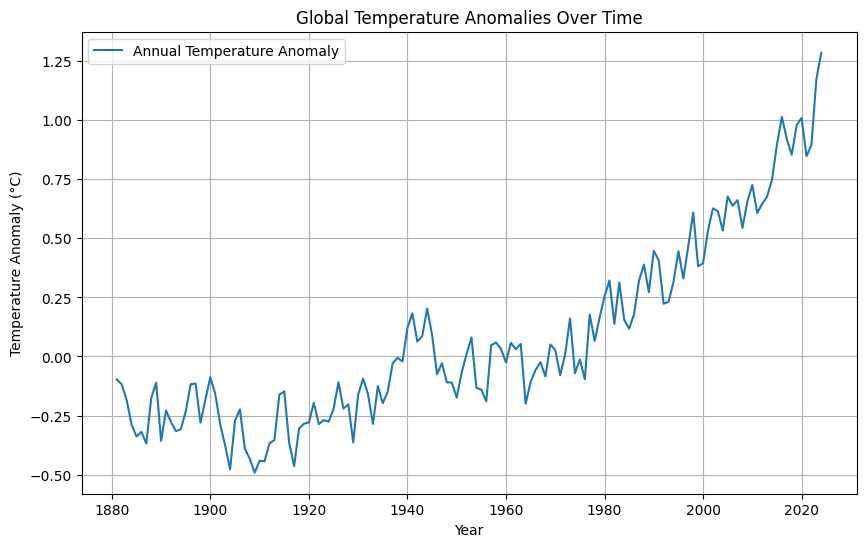

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
url = "https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv"
data = pd.read_csv(url, skiprows=1)  # Skip the header row

# Display the first few rows
print(data.head())

# Clean the data
# Remove rows with missing values
data = data.replace("***", np.nan)  # Replace missing value indicators with NaN
data = data.dropna()

# Convert the 'Year' column to integer and temperature columns to float
data['Year'] = data['Year'].astype(int)
for col in data.columns[1:13]:  # Monthly temperature columns
    data[col] = data[col].astype(float)

# Calculate the annual average temperature anomaly
data['Annual'] = data.iloc[:, 1:13].mean(axis=1)

# Keep only the 'Year' and 'Annual' columns
data = data[['Year', 'Annual']]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Annual'], label='Annual Temperature Anomaly')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Global Temperature Anomalies Over Time')
plt.legend()
plt.grid()
plt.show()

Mean Squared Error: 0.02003598708811379


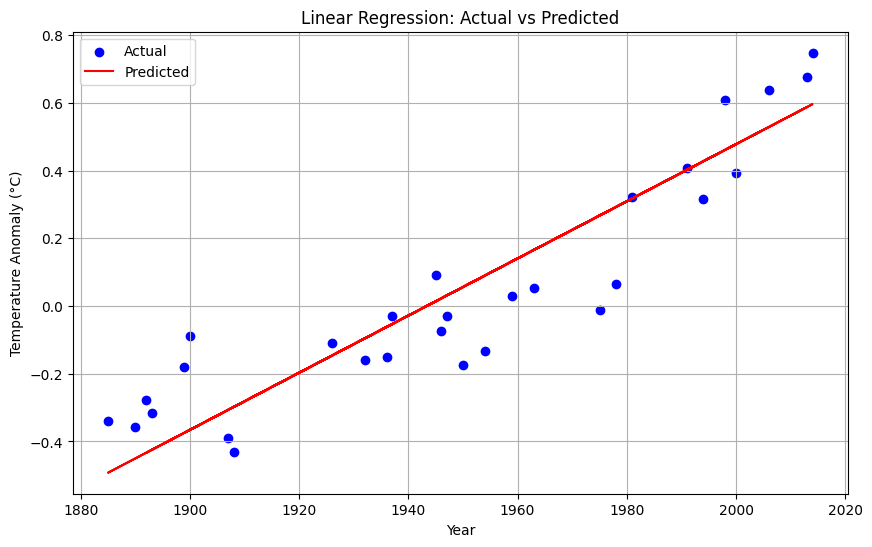

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data
X = data[['Year']]  # Feature: Year
y = data['Annual']  # Target: Annual Temperature Anomaly

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.grid()
plt.show()

Year: 2025, Predicted Temperature Anomaly: 0.6893 °C
Year: 2030, Predicted Temperature Anomaly: 0.7315 °C
Year: 2035, Predicted Temperature Anomaly: 0.7737 °C
Year: 2040, Predicted Temperature Anomaly: 0.8159 °C
Year: 2045, Predicted Temperature Anomaly: 0.8581 °C
Year: 2050, Predicted Temperature Anomaly: 0.9003 °C


c:\Users\sumit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


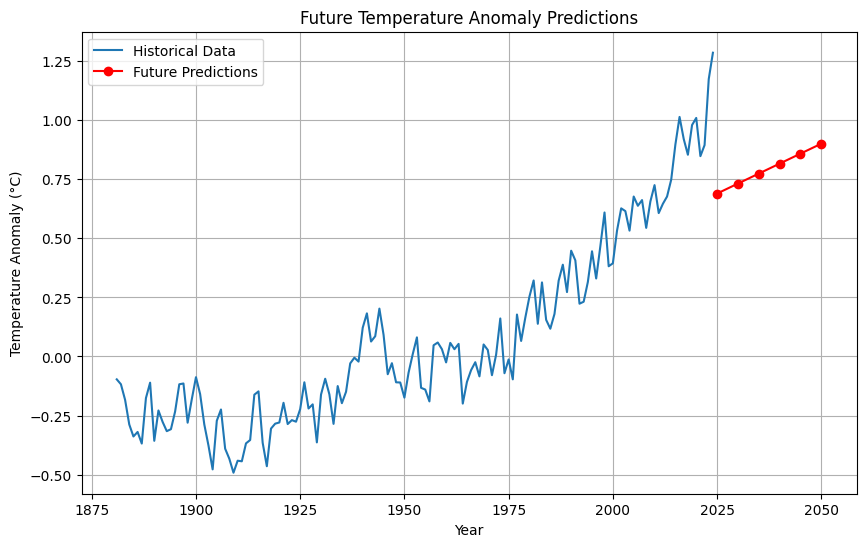

In [5]:
# Predict temperature anomalies for future years
future_years = np.array([[2025], [2030], [2035], [2040], [2045], [2050]])
future_predictions = model.predict(future_years)

# Display predictions
for year, pred in zip(future_years, future_predictions):
    print(f"Year: {year[0]}, Predicted Temperature Anomaly: {pred:.4f} °C")

# Plot future predictions
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Annual'], label='Historical Data')
plt.plot(future_years, future_predictions, 'ro-', label='Future Predictions')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Future Temperature Anomaly Predictions')
plt.legend()
plt.grid()
plt.show()